In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [74]:
df = pd.read_excel("marketing_data.xlsx")

In [75]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03 00:00:00,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12 00:00:00,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,149,165,63,1,5,4,10,3,0,0


## Preprocessing


### Handling null values


In [76]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

Solutions in dealing with the null values

- Fill null values of Income with the median of their respective groups
- Fill null values of Income with 0
- Remove rows with null values

Sidenote: Since there is a weak relationship between income and education + income and marital status based on previous testing, I chose the option removing rows with null values


In [77]:
df = df.dropna(subset='Income').reset_index(drop=True)

In [78]:
# df['Income'] = df.groupby(['Marital_Status', 'Education'])[
#     'Income'].transform(lambda x: x.fillna(x.median()))

# df['Income'] = df['Income'].fillna(0)

### Feature Engineering


Create `Total_children`


In [79]:
df = df.assign(Total_Children=df.Kidhome + df.Teenhome)

<Axes: xlabel='Total_Children', ylabel='count'>

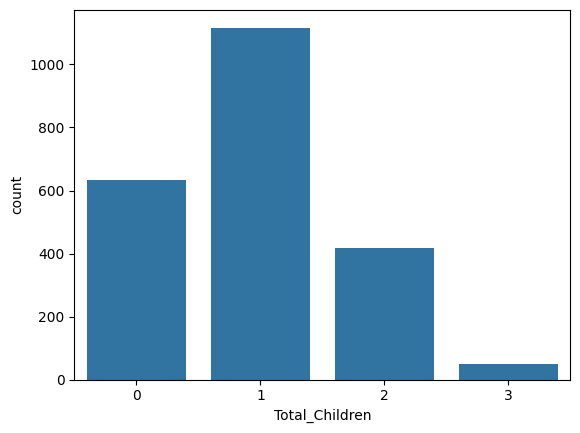

In [80]:
sns.barplot(df.Total_Children.value_counts())

Removing entries where someone's age could not be realistically alive today


In [81]:
print(np.sort(df.Year_Birth.unique()))
print(df.Year_Birth.min())
print(df.Year_Birth.max())

[1893 1899 1900 1940 1941 1943 1944 1945 1946 1947 1948 1949 1950 1951
 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996]
1893
1996


In [82]:
df = df[df.Year_Birth >= 1940]

Convert `Dt_Customer` to datetime and create a column for days since they first became a customer


In [83]:
df.Dt_Customer

0                   6/16/14
1                   6/15/14
2                   5/13/14
3       2014-11-05 00:00:00
4       2014-08-04 00:00:00
               ...         
2211    2013-07-03 00:00:00
2212                1/22/13
2213    2012-03-12 00:00:00
2214               11/29/12
2215    2012-01-09 00:00:00
Name: Dt_Customer, Length: 2213, dtype: object

In [84]:
from datetime import datetime

df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

C:\Users\JOSHUA KYLE\AppData\Local\Temp\ipykernel_1432\940480752.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.Dt_Customer = pd.to_datetime(df.Dt_Customer)


Checking for future dates


In [85]:
df[df.Dt_Customer > datetime.now()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Children


Checking for customer dates older than their age


In [86]:
df[df.Dt_Customer.dt.year < df.Year_Birth]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Children


In [87]:
curr_date = datetime.now()
df['Days_Since_Customer'] = (curr_date - df.Dt_Customer).dt.days

In [88]:
df.Days_Since_Customer

0       3543
1       3544
2       3577
3       3401
4       3494
        ... 
2211    3891
2212    4053
2213    4369
2214    4107
2215    4432
Name: Days_Since_Customer, Length: 2213, dtype: int64

Solutions for invalid marital status:

- Replace them with a valid one based on assumptions
- Drop records where marital status are the following: YOLO, Absurd, Alone


In [89]:
df['Marital_Status'] = df['Marital_Status'].replace(
    {'YOLO': 'Single',
     'Absurd': 'Single',
     'Alone': 'Single'})

In [90]:
# df.drop(df[df.Marital_Status.isin(['YOLO', 'Absurd', 'Alone'])].index).reset_index(drop=True)

### Removing outliers


creating the function for removing outliers in continuous variables


In [91]:
from scipy.stats import zscore


def remove_outliers(data, column, z_thresh=2):
    z_scores = np.abs(zscore(data[column], nan_policy='omit'))

    non_outlier_indices = np.where(z_scores < z_thresh)[0]

    print(data.shape)
    no_outliers = data.iloc[non_outlier_indices]
    print(no_outliers.shape)
    return no_outliers

Removing outlier for `Income` columns


In [92]:
df = remove_outliers(df, 'Income')

(2213, 24)
(2201, 24)


Removing outliers for `Mnt.*` columns


MntWines skew: 1.1671356668503003
MntFishProducts skew: 1.913331892663713
MntMeatProducts skew: 1.8195327324947486
MntFruits skew: 2.101690656364071
MntGoldProds skew: 1.8393203654148187
MntSweetProducts skew: 2.0671793284414433


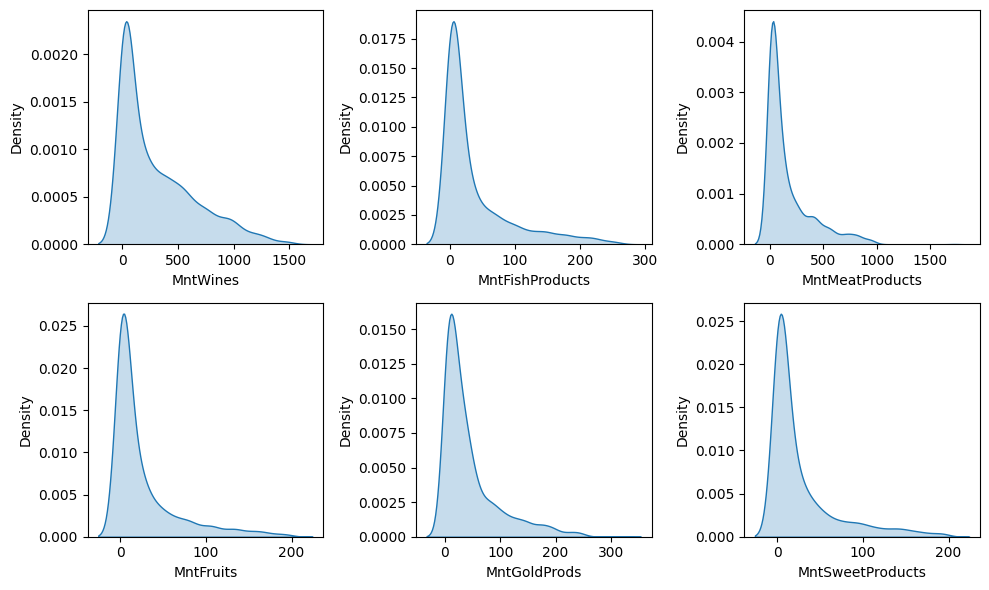

In [93]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for ax, col in zip(axes.flat, ['MntWines', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntGoldProds', 'MntSweetProducts']):
    print(f'{col} skew: {df[col].skew()}')
    sns.kdeplot(df, x=col, fill=True, ax=ax)

fig.tight_layout()
plt.show()

In [94]:
for col in ['MntWines', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntGoldProds', 'MntSweetProducts']:
    df = remove_outliers(df, col)

(2201, 24)
(2076, 24)
(2076, 24)
(1922, 24)
(1922, 24)
(1799, 24)
(1799, 24)
(1695, 24)
(1695, 24)
(1589, 24)
(1589, 24)
(1508, 24)


MntWines skew: 1.6307011851932947
MntFishProducts skew: 2.9287689666083234
MntMeatProducts skew: 2.4826648223717878
MntFruits skew: 2.383670899053897
MntGoldProds skew: 1.7024478455766348
MntSweetProducts skew: 2.058738113884398


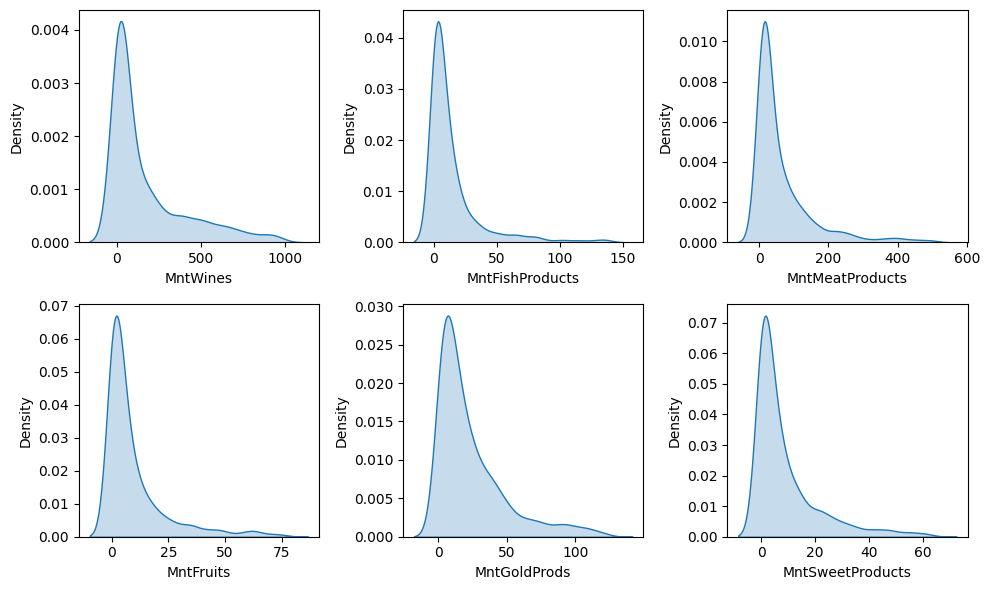

In [95]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for ax, col in zip(axes.flat, ['MntWines', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntGoldProds', 'MntSweetProducts']):
    print(f'{col} skew: {df[col].skew()}')
    sns.kdeplot(df, x=col, fill=True, ax=ax)

fig.tight_layout()
plt.show()

Removing outliers for `Num.*` columns


NumDealsPurchases skew: 2.0092487892890953
NumCatalogPurchases skew: 2.0713831262265363
NumStorePurchases skew: 1.3159728571365374
NumWebPurchases skew: 1.0127769739426422


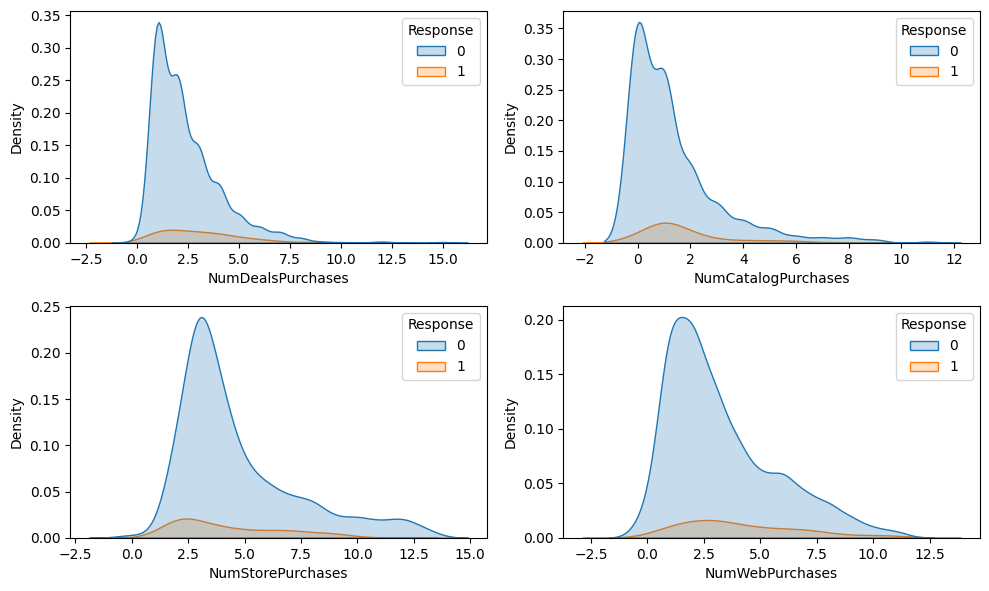

In [96]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for ax, col in zip(axes.flat, ['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']):
    print(f'{col} skew: {df[col].skew()}')
    sns.kdeplot(df, x=col, hue='Response', fill=True, ax=ax)

fig.tight_layout()
plt.show()

In [97]:
for col in ['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']:
    df = remove_outliers(df, col)

(1508, 24)
(1451, 24)
(1451, 24)
(1350, 24)
(1350, 24)
(1281, 24)
(1281, 24)
(1214, 24)


NumDealsPurchases skew: 1.0319000729303454
NumCatalogPurchases skew: 1.3703983457781987
NumStorePurchases skew: 1.2680368318286055
NumWebPurchases skew: 0.9235335529752192


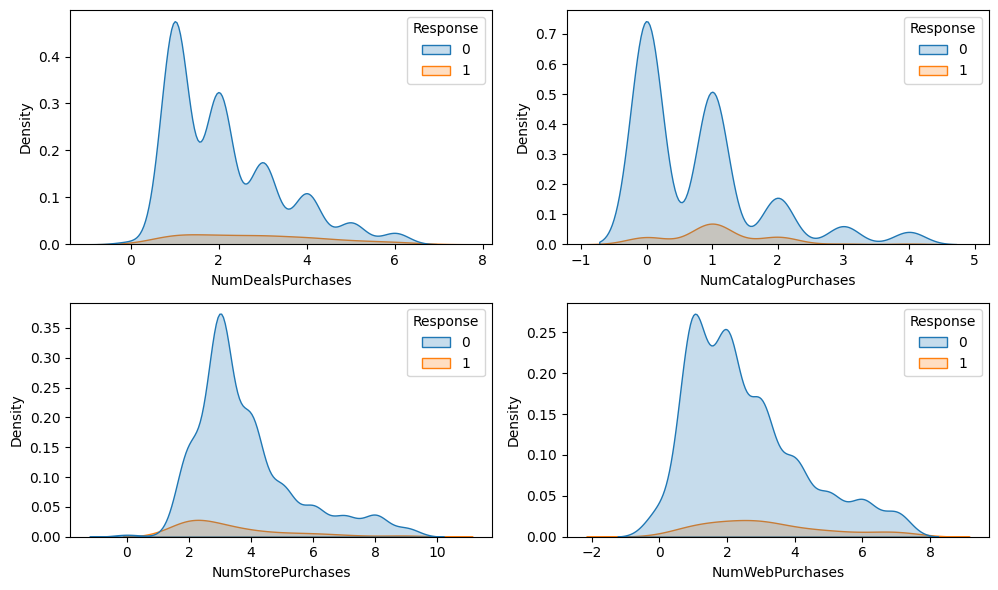

In [98]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for ax, col in zip(axes.flat, ['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']):
    print(f'{col} skew: {df[col].skew()}')
    sns.kdeplot(df, x=col, hue='Response', fill=True, ax=ax)

fig.tight_layout()
plt.show()

### One-Hot Encoding


In [99]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], prefix=column, drop_first=True)
    data = data.drop(column, axis=1)
    data = data.join(encoded)
    return data

In [100]:
df = one_hot_encode(df, 'Education')
df = one_hot_encode(df, 'Marital_Status')

In [101]:
df

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Total_Children,Days_Since_Customer,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
1,1,1961,57091.0,0,0,2014-06-15,0,464,5,64,...,0,3544,False,True,False,False,False,True,False,False
2,10476,1958,67267.0,0,1,2014-05-13,0,134,11,59,...,1,3577,False,True,False,False,True,False,False,False
3,1386,1967,32474.0,1,1,2014-11-05,0,10,0,1,...,2,3401,False,True,False,False,False,False,True,False
4,5371,1989,21474.0,1,0,2014-08-04,0,6,16,24,...,1,3494,False,True,False,False,False,True,False,False
7,1991,1967,44931.0,0,1,2014-01-18,0,78,0,11,...,1,3692,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,3363,1974,20130.0,0,0,2014-03-17,99,0,6,3,...,0,3634,False,False,False,False,True,False,False,False
2207,8595,1973,42429.0,0,1,2014-11-02,99,55,0,6,...,1,3404,False,True,False,False,False,False,False,True
2208,7232,1973,42429.0,0,1,2014-11-02,99,55,0,6,...,1,3404,False,True,False,False,False,False,False,True
2212,5263,1977,31056.0,1,0,2013-01-22,99,5,10,13,...,1,4053,False,False,False,False,True,False,False,False


### Interaction features


Since marital status significantly affects the number of children and teenagers at home based on the ANOVA tests we used in the EDA, we performed interaction features in these features.


In [102]:
marital_columns = [col for col in df.columns if col.startswith('Marital_')]

for col in marital_columns:
    df[f'A_{col}_Kidhome'] = df[col] * df['Kidhome']
    df[f'A_{col}_Teenhome'] = df[col] * df['Teenhome']

In [103]:
from sklearn.preprocessing import *

sc = StandardScaler()

## Export to parquet


In [104]:
df.to_parquet('parquet/preprocessed.parquet', engine='pyarrow', index=False)

## Testing


In [105]:
from sklearn.model_selection import *

X = df.drop('Response', axis=1)
y = df.Response

In [106]:
# kf = KFold(n_splits=9, shuffle=True)

In [107]:
skf = StratifiedKFold(n_splits=5)

In [108]:
for (train, test) in skf.split(X, y):
    print(test.shape)

(243,)
(243,)
(243,)
(243,)
(242,)
